In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from tidyData import*
#from Feature_Eng import*

In [4]:
df = pd.read_csv('tidy_data_new')
df_dataset, df_testset = split_data(df)

dataset saved as <df_dataset.csv>
df_testset saved as <df_testset.csv>


In [5]:
df_dataset.head(5)

,index,gameID_eventID,game_period,dateTime,gameID,team,goal,x,y,shooter,...,rebound,speed,time_since_powerplay_started,nbFriendly_non_goalie_skaters,nbOpposing_non_goalie_skaters,team_side,distanceNet_or_shotDistance,angleNet_or_shotAngleWithSign,shot_angle_absolute,change_in_shot_angle
5475,5475,2015020001_8,1,2015-10-07T23:24:23Z,2015020001,Toronto Maple Leafs,0,-55.0,6.0,Brad Boyes,...,False,14.025066,0,5,5,right,34.525353,-10.007980,10.007980,0.000000
5476,5476,2015020001_9,1,2015-10-07T23:24:38Z,2015020001,Toronto Maple Leafs,0,-79.0,0.0,Nazem Kadri,...,False,7.211103,0,5,5,right,10.000000,0.000000,0.000000,0.000000
5477,5477,2015020001_16,1,2015-10-07T23:27:21Z,2015020001,Toronto Maple Leafs,0,-75.0,-1.0,Nazem Kadri,...,True,4.123106,0,5,5,right,14.035669,4.085617,4.085617,4.085617
5478,5478,2015020001_10,1,2015-10-07T23:25:24Z,2015020001,Toronto Maple Leafs,0,-55.0,-36.0,Daniel Winnik,...,False,4.422515,0,5,5,right,49.517674,46.636577,46.636577,0.000000
5479,5479,2015020001_14,1,2015-10-07T23:27:08Z,2015020001,Toronto Maple Leafs,0,-61.0,-1.0,Joffrey Lupul,...,False,4.494441,0,5,5,right,28.017851,2.045408,2.045408,0.000000


In [6]:
df_dataset_nogoals = df_dataset[df_dataset['goal']==0]
df_dataset_goals = df_dataset[df_dataset['goal']==1]

In [7]:
sns.set()

<Figure size 640x480 with 0 Axes>

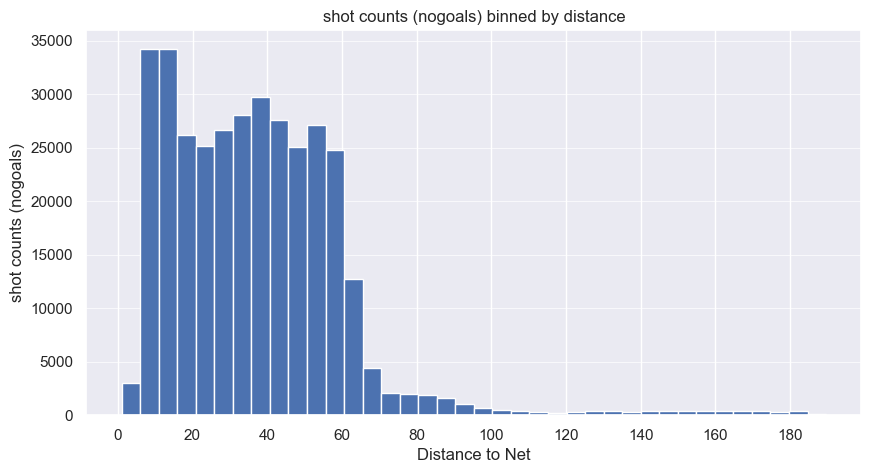

<Figure size 640x480 with 0 Axes>

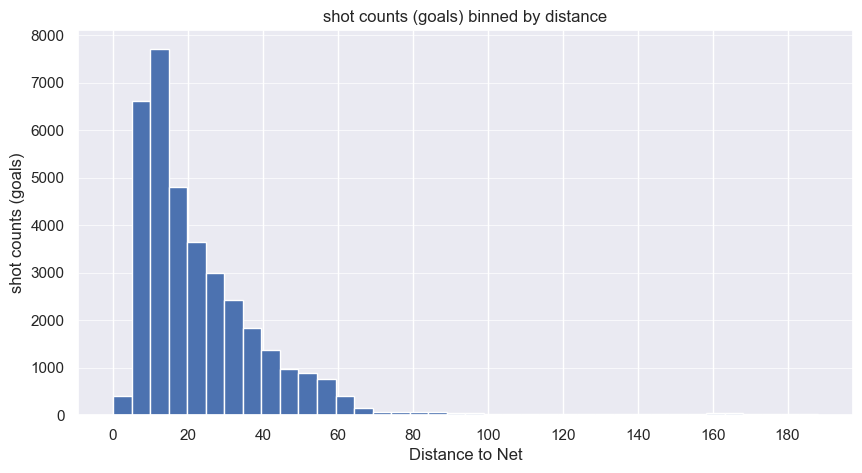

In [8]:
# Histogram of shot counts - nogoal
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
bins = np.arange(0,200,20)
plt.hist(df_dataset_nogoals['distanceNet_or_shotDistance'], edgecolor='white', 
        bins=math.ceil((df_dataset_nogoals['distanceNet_or_shotDistance'].max() - df_dataset_nogoals['distanceNet_or_shotDistance'].min())/5))
plt.title('shot counts (nogoals) binned by distance')
plt.xlabel('Distance to Net')
plt.ylabel('shot counts (nogoals)')
plt.xticks(bins)
plt.show()
fig.savefig('M2_Q2_1.png')
# Histogram of shot counts - goals
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
bins = np.arange(0,200,20)
plt.hist(df_dataset_goals['distanceNet_or_shotDistance'], edgecolor='white', 
        bins=math.ceil((df_dataset_goals['distanceNet_or_shotDistance'].max() - df_dataset_goals['distanceNet_or_shotDistance'].min())/5))
plt.title('shot counts (goals) binned by distance')
plt.xlabel('Distance to Net')
plt.ylabel('shot counts (goals)')
plt.xticks(bins)
plt.show()
fig.savefig('M2_Q2_2.png')

<Figure size 640x480 with 0 Axes>

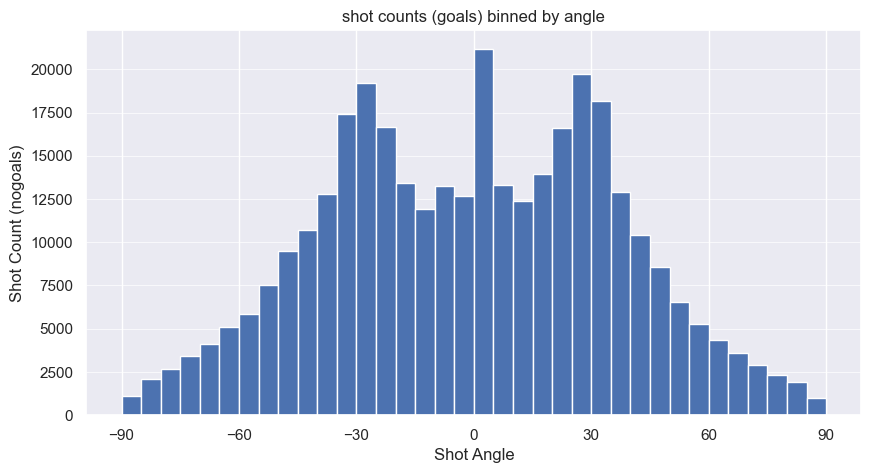

<Figure size 640x480 with 0 Axes>

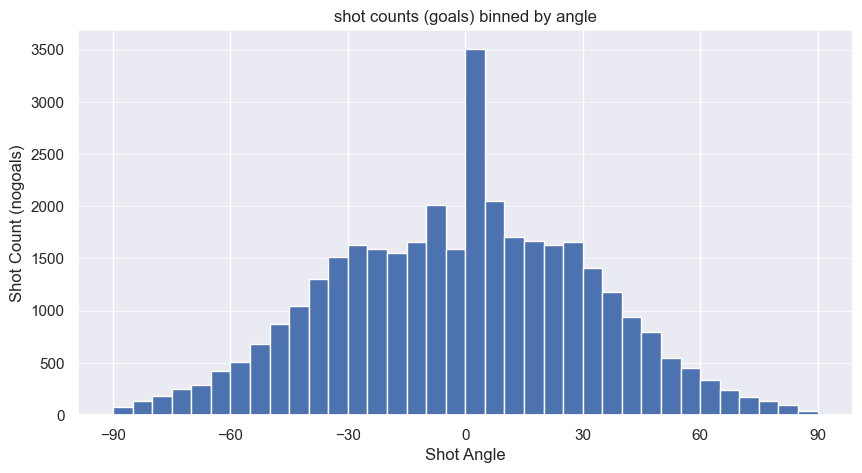

In [9]:
# Histogram of shot counts - goals
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
plt.hist(df_dataset_nogoals['angleNet_or_shotAngleWithSign'], edgecolor='white',
        bins=math.ceil((df_dataset_nogoals['angleNet_or_shotAngleWithSign'].max() - df_dataset_nogoals['angleNet_or_shotAngleWithSign'].min())/5))
plt.title('shot counts (goals) binned by angle')
plt.xlabel('Shot Angle')
plt.ylabel('Shot Count (nogoals)')
plt.xticks(np.arange(-90,120,30))
plt.show()
fig.savefig('M2_Q2_3.png')
# Histogram of shot counts - nogoals
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
plt.hist(df_dataset_goals['angleNet_or_shotAngleWithSign'], edgecolor='white',
        bins=math.ceil((df_dataset_goals['angleNet_or_shotAngleWithSign'].max() - df_dataset_goals['angleNet_or_shotAngleWithSign'].min())/5))
plt.title('shot counts (goals) binned by angle')
plt.xlabel('Shot Angle')
plt.ylabel('Shot Count (nogoals)')
plt.xticks(np.arange(-90,120,30))
plt.show()
fig.savefig('M2_Q2_4.png')

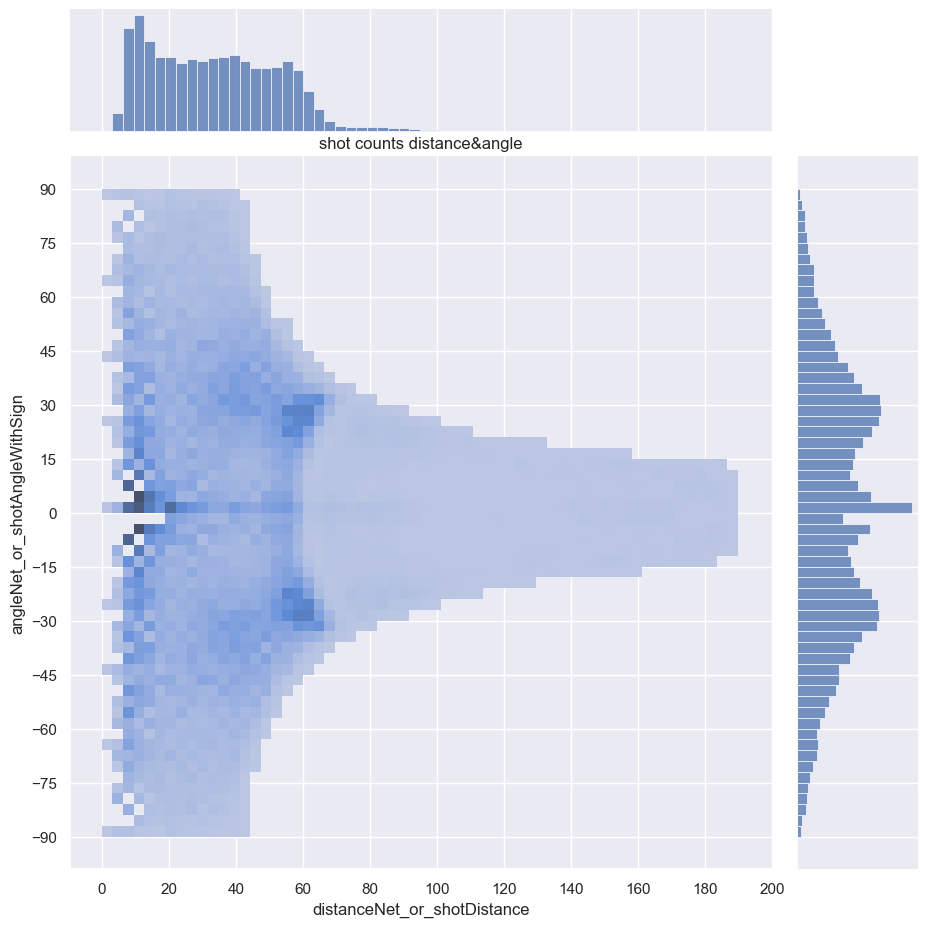

In [11]:
sns.set_palette("Paired")
sns.set(font_scale = 1)
grid = sns.jointplot(data=df_dataset, x="distanceNet_or_shotDistance", y="angleNet_or_shotAngleWithSign",legend=False, kind = "hist",
        marginal_kws=dict(bins=60),joint_kws=dict(bins=60))
grid.fig.set_figwidth(10)
grid.fig.set_figheight(10)
plt.title('shot counts distance&angle')
plt.yticks(np.arange(-90,105,15))
values = np.arange(0,220,20)
plt.xticks(values)
plt.show()
fig.savefig("M2_Q2_5.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\haooy\AppData\Local\Temp\ipykernel_85692\547714090.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


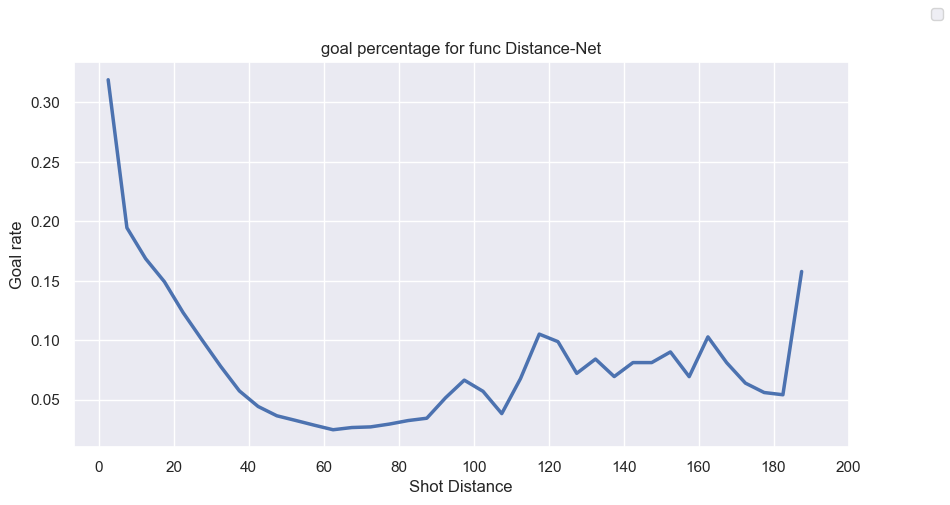

In [12]:
df1 = df.copy()
bins = list(np.arange(0, 200,  5))
bin_centers = list(np.arange(2.5, 197.5,  5.0))

df1['distanceNetBins'] = pd.cut(df1['distanceNet_or_shotDistance'], bins, labels = bin_centers)
df1['shot'] = 1
df1 = df1[['distanceNetBins', 'shot', 'goal' ]].groupby(['distanceNetBins']).sum().reset_index()
df1['rate'] = df1['goal']/df1['shot']
#print(df_1819_2021.sample(10))

fig = plt.figure(figsize = (10,5))
plt.title(f"goal percentage for func Distance-Net")
ax = sns.lineplot(x = 'distanceNetBins', y = 'rate', data = df1, legend = False, linewidth = 2.5)
fig.legend(loc="upper right")
plt.xlabel('Shot Distance')
plt.ylabel('Goal rate')
plt.xticks(np.arange(0,220,20))
fig.show()
fig.savefig("M2_Q2_6.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\haooy\AppData\Local\Temp\ipykernel_85692\3650384.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


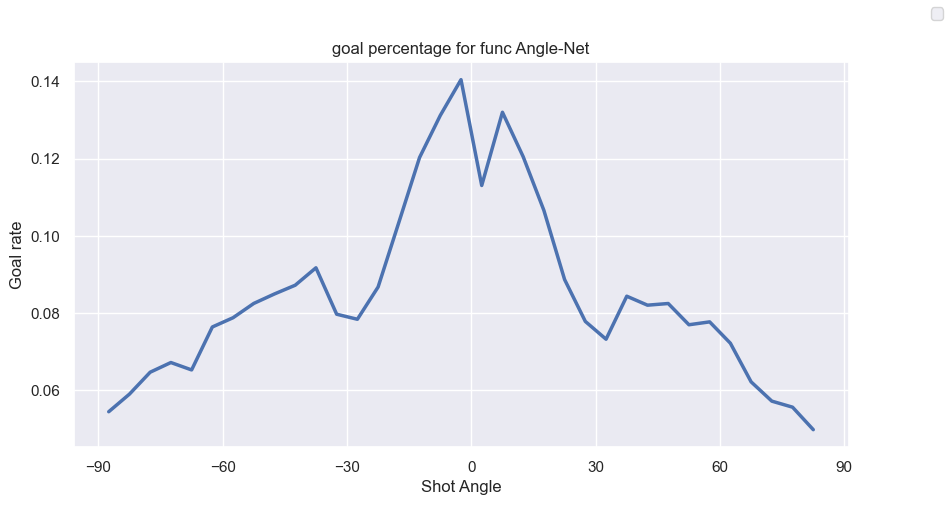

In [13]:
df2 = df.copy()
bins = list(np.arange(-90, 90,  5))
bin_centers = list(np.arange(-87.5, 87.5,  5))

df2['angleNetBins'] = pd.cut(df2['angleNet_or_shotAngleWithSign'], bins, labels = bin_centers)
df2['shot'] = 1
df2 = df2[['angleNetBins', 'shot', 'goal' ]].groupby(['angleNetBins']).sum().reset_index()
df2['rate'] = df2['goal']/df2['shot']
#print(df_1819_2021.sample(10))

fig = plt.figure(figsize = (10,5))
plt.title(f"goal percentage for func Angle-Net")
ax = sns.lineplot(x = 'angleNetBins', y = 'rate', data = df2, legend = False, linewidth = 2.5)
fig.legend(loc="upper right")
plt.xlabel('Shot Angle')
plt.ylabel('Goal rate')
plt.xticks(np.arange(-90,120,30))
fig.show()
fig.savefig("M2_Q2_7.png")

In [14]:
df_dataset_empNet = df_dataset[(df_dataset['emptyNet']==1)&(df_dataset['goal']==1)]
df_dataset_Net = df_dataset[(df_dataset['emptyNet']==0)&(df_dataset['goal']==1)]

<Figure size 640x480 with 0 Axes>

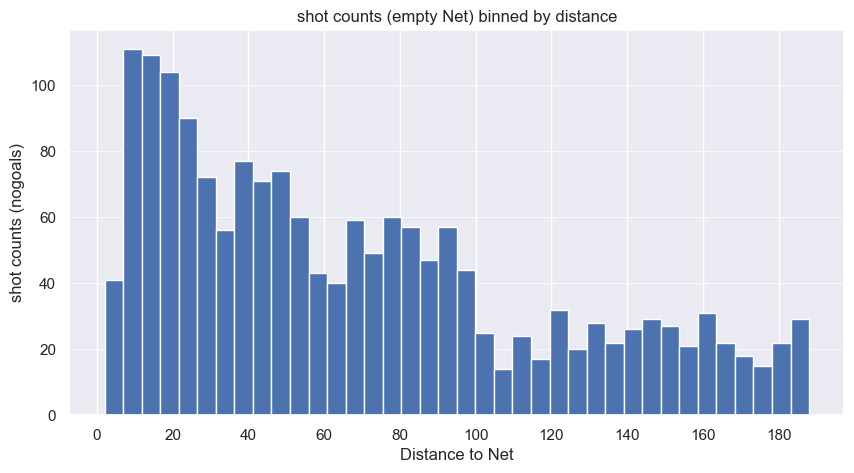

<Figure size 640x480 with 0 Axes>

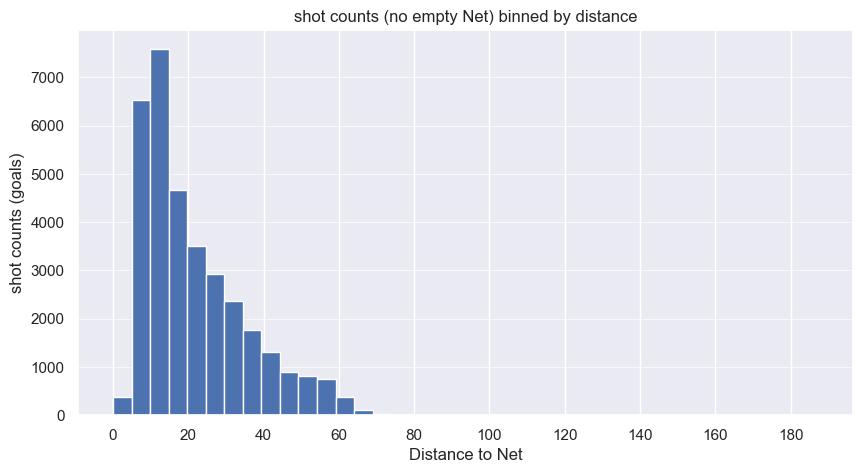

In [16]:
# Histogram of shot counts - empNet
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
bins = np.arange(0,200,20)
plt.hist(df_dataset_empNet['distanceNet_or_shotDistance'], edgecolor='white', 
        bins=math.ceil((df_dataset_empNet['distanceNet_or_shotDistance'].max() - df_dataset_empNet['distanceNet_or_shotDistance'].min())/5))
plt.title('shot counts (empty Net) binned by distance')
plt.xlabel('Distance to Net')
plt.ylabel('shot counts (nogoals)')
plt.xticks(bins)
plt.show()
fig.savefig('M2_Q2_8.png')
# Histogram of shot counts - Net
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plt.grid(axis='y',linewidth = 0.5)
bins = np.arange(0,200,20)
plt.hist(df_dataset_Net['distanceNet_or_shotDistance'], edgecolor='white', 
        bins=math.ceil((df_dataset_Net['distanceNet_or_shotDistance'].max() - df_dataset_Net['distanceNet_or_shotDistance'].min())/5))
plt.title('shot counts (no empty Net) binned by distance')
plt.xlabel('Distance to Net')
plt.ylabel('shot counts (goals)')
plt.xticks(bins)
plt.show()
fig.savefig('M2_Q2_9.png')

In [17]:
#it is incredibly rare to score a non-empty net goal on the opposing team from within your defensive zone
#opposing team >89
df_goals = df_dataset[df_dataset['goal']==1]
df_goals_anomal = df_goals[(df_goals['x'].abs()>89)&(df_goals['distanceNet_or_shotDistance']>89)&(df_goals['emptyNet']==0)]
df_goals_anomal
#https://www.nhl.com/video/mackenzie-buries-the-one-timer/t-283249606/c-47688603
#Normal shot, see screenshot .png


,index,gameID_eventID,game_period,dateTime,gameID,team,goal,x,y,shooter,...,rebound,speed,time_since_powerplay_started,nbFriendly_non_goalie_skaters,nbOpposing_non_goalie_skaters,team_side,distanceNet_or_shotDistance,angleNet_or_shotAngleWithSign,shot_angle_absolute,change_in_shot_angle
115644,115644,2016020510_297,2,2016-12-24T01:59:05Z,2016020510,Florida Panthers,1,-97.0,21.0,Derek MacKenzie,...,False,38.439888,0,5,5,left,187.18173,6.4416,6.4416,0.0
